In [1]:
import json
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import cv2

In [2]:
# https://www.robots.ox.ac.uk/~vgg/software/via/via.html

In [3]:
# Load the image
image = Image.open("masking_vgg/3.png")

# Parse the JSON data
with open("masking_vgg/3.json", "r") as f:
    data = json.load(f)

In [7]:
data

{'3.png1206246': {'filename': '3.png',
  'size': 1206246,
  'regions': [{'shape_attributes': {'name': 'polyline',
     'all_points_x': [199,
      365,
      444,
      448,
      446,
      511,
      643,
      799,
      932,
      982,
      611,
      374,
      193,
      191,
      182],
     'all_points_y': [723,
      591,
      513,
      479,
      473,
      467,
      508,
      596,
      687,
      716,
      710,
      726,
      724,
      724,
      723]},
    'region_attributes': {}}],
  'file_attributes': {}}}

In [8]:
# Create a new binary mask image
mask = Image.new("RGB", image.size, (0, 0, 0))

# Draw the polygon on the mask image
draw = ImageDraw.Draw(mask)
for region in data['3.png1206246']["regions"]:
    x = region["shape_attributes"]["all_points_x"]
    y = region["shape_attributes"]["all_points_y"]
    xy = list(zip(x, y))
    if region["region_attributes"] == {}:
        color = (223, 19, 250)  # Yellow for the road
    elif region['file_attributes'] == {}:
        color = (217, 163, 198)  # Brown for the lane markings
    draw.polygon(xy, fill=color)

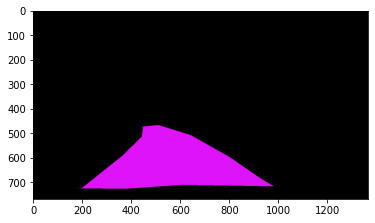

In [9]:
plt.imshow(mask)

In [18]:
# mask.save("3_mask.png")